##                          ASSIGNMENT-2

## 1. Build a grid-world environment [many agents – many goals]

## We certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that we did not receive any external help, coaching or contributions during the production of this work.

In [ ]:
import numpy as np
import gym
from gym import spaces
import copy
from copy import copy
import matplotlib.pyplot as plt
import random

class MAGridWorld(gym.Env):                                                     #creating an environment
    metadata = { 'render.modes' : ['human', 'ansi'] }
    def __init__(self, size, n_agents):
        self.size = size
        self._grid_size = (self.size, self.size)
        self.world = np.zeros((self._grid_size))
        self._timestep = None
        self._max_timestep = int(self.size*4)
        self.n_agents = n_agents
        self.dist = int((self.size-1)/(n_agents-1))
        self._step_cost = -0.1
        self.observation_space = spaces.Box(low=0, high=self.size, shape=(self.size, self.size))
        self.action_space = spaces.Discrete(5)
        
    def reset(self):
        self.agent_pos = []                                                     #number of goals are given is 2 
        self.goal_pos = []
        self._timestep = 0
        self.done = [False for i in range(self.n_agents)]
        for i in range(self.n_agents):
            self.agent_pos.append([self.size-1, i*self.dist])
            self.goal_pos.append([0, i*self.dist])
        self.goal_pos.reverse()
        observation = self.agent_pos
        return observation
    
    def _compute_distance(self, x, y):
        dist = np.abs(x[0]-y[0]) + np.abs(x[1]-y[1])
        return dist
    
    def _is_inside_grid(self, pos):
        return (0 <= pos[0] < self._grid_size[0]) and (0 <= pos[1] < self._grid_size[1])

    def _is_collision(self, new_pos, agent):
        for i in range(self.n_agents):
            if i == agent:
                continue
            elif new_pos == self.agent_pos[i]:
                return True
            elif new_pos == self.goal_pos[i]:
                return True
        
    def step(self, actions):                                                   
        self._timestep += 1
        old_pos = self.agent_pos.copy()
        rewards = [0 for _ in range(self.n_agents)]       
        
        for i in range(self.n_agents):                                          #for negative move the rewards are -0.1 and -0.5 and for positive move the rewards are 0.1 and 0.5
            self.update_agent_pos(i, actions[i])
            old_dist = self._compute_distance(old_pos[i], self.goal_pos[i])
            new_dist = self._compute_distance(self.agent_pos[i], self.goal_pos[i])
            
            if new_dist < old_dist:
                rewards[i] = -0.1
            elif new_dist > old_dist:
                rewards[i] = -0.5

            elif (new_dist == old_dist) and not self.done[i]:
                rewards[i] = -0.5
            
            if (self.agent_pos[i] == self.goal_pos[i]):
                self.done[i] = True
                rewards[i] = 1
            else:
                self.done[i] = False
                    
               
        if self._timestep >= self._max_timestep:
            self.done = [True for i in range(self.n_agents)]
            
        observation = self.agent_pos
        info = {}
        return observation, rewards, self.done, info #all(done)
    
        
    def update_agent_pos(self, agent, action):                                  #there are 5 actions that is up,down,right,left and no move
        next_pos = copy(self.agent_pos[agent])
        if action == 0: # Down
            next_pos[0] += 1
        elif action == 1: # Up
            next_pos[0] -= 1
        elif action == 2: # Right
            next_pos[1] += 1
        elif action == 3: # Left
            next_pos[1] -= 1
        elif action == 4: # No move
            pass
        else:
            raise Exception('Action is not valid')                              # if the action is apart from any other apart from up,down,right,left and no move it raises invalid action performed by agents
            
        if self._is_inside_grid(next_pos) and not self._is_collision(next_pos, agent):
            self.agent_pos[agent] = next_pos
        else:
            pass
        
            
    def render(self):
        state = np.copy(self.world)
        for i in range(self.n_agents):
            state[tuple(self.agent_pos[i])] = 5 - (0.5 * i)
            state[tuple(self.goal_pos[i])] = 5 - (0.5 * i)
        return plt.imshow(state)

Testing the environment

In [ ]:
config = {
    'N_AGENTS' : 2,                                                             #number of agents is 2
    'GRID_SIZE' : 6,                                                            #the grid size of the environment is 6*6
    'NUM_EPISODES': 100                                                         # the number of episodes is 100
}

state [[4, 0], [4, 5]]
reward [-0.1, -0.1]
done [False, False]


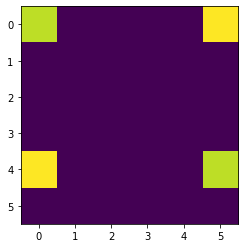

In [ ]:
if __name__ == '__main__':
    n_agents = config['N_AGENTS']
    size = config['GRID_SIZE']
    env = MAGridWorld(size=size, n_agents=n_agents)
    env.reset()
    env.render()
    action_n = [1, 1, 1, 0, 1]                                                  #the number of actions is 5
    state, reward, done, _ = env.step(action_n)
    print('state', state)
    print('reward', reward)
    print('done', done)
    env.render()

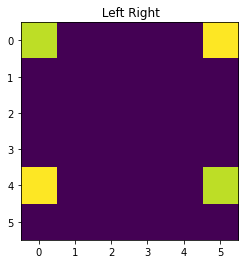

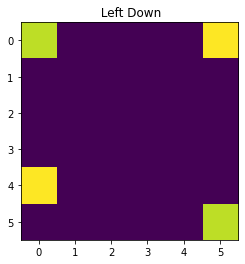

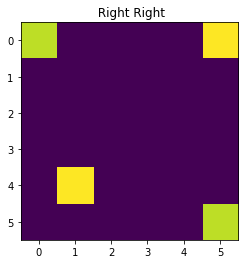

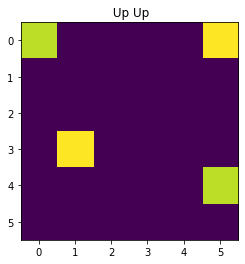

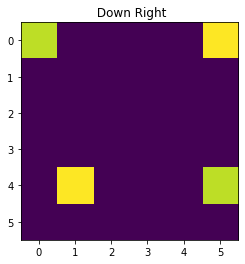

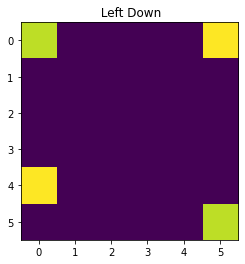

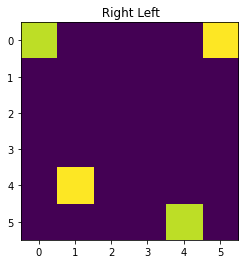

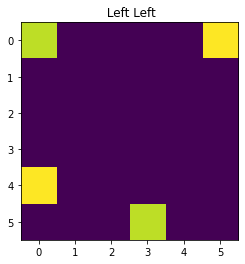

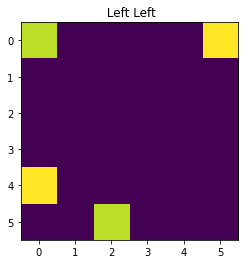

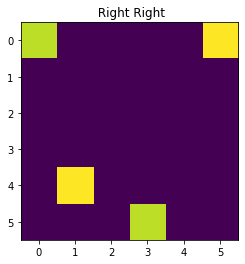

In [ ]:

import time
for i in range(10): # we run the agents 10 times till it reaches the goals 
  actions = []
  for _ in range(n_agents):
      actions.append(np.random.randint(4))

  action_txt = {0:"Down",1:"Up",2:"Right",3:"Left"}

#for action in actions:
  state,reward,done,_=env.step(actions)
  plt.figure()
  t = ""
  for a in actions:
    t+= " "+action_txt[a]
  plt.title(t)
  env.render()
  time.sleep(0.1)

Training

In [ ]:
q_table = np.zeros([2,6,6,5]) # q table takes the argument of number of number of agents,grid size and number of actions
print(q_table[0][0][0])

[0. 0. 0. 0. 0.]


In [ ]:
alpha = 0.02 #learning rate 
gamma = 0.95 #discount factor
epsilon = 1 #used for epsilon greedy
epsilon_decay= 0.999 # epsilon decay
num_epi= 5000 # number of episodes 
env = MAGridWorld(6,2)

r1,r2 = [],[]
rew = [0,0]
epsilon_decaying = []

for episode in range(num_epi+1):

  if episode % 10 == 0:
    rew = [i/10 for i in rew]
    print(f"Episode: {episode} Reward: {rew}")
    r1.append(rew[0])
    r2.append(rew[1])
    epsilon_decaying.append(epsilon)
    rew = [0,0]
  
  # env.reset()

  state1, state2 =  env.reset()


  state1 = tuple(state1)
  state2 = tuple(state2)
  
  done = [False]*2
  t = 0
  action1 = 0
  action2 = 0
  
  while (not (done[0] or done[1]) and t<=100):
    t+=1
    # print(t)
    if np.random.uniform(0, 1) < epsilon:
      action1 = np.random.randint(5) # Explore action space
      action2 = np.random.randint(5)
      
    else:
      action1 = np.argmax(q_table[0][state1]) # Exploit learned values
      action2 = np.argmax(q_table[1][state2])
      
    next_state, reward, done, info = env.step([action1,action2])
    
    ns1 = next_state[0]
    ns2 = next_state[1]
    

    ns1 = tuple(ns1)
    ns2 = tuple(ns2)
    
    na1 = np.argmax(q_table[0][ns1])
    na2 = np.argmax(q_table[1][ns2])

    r = sum(reward)

    q_table[0][state1][action1] += alpha*( reward[0] + gamma*(q_table[0][ns1][na1] - q_table[0][state1][action1]))
    q_table[1][state2][action2] += alpha*( reward[1] + gamma*(q_table[1][ns2][na2] - q_table[1][state2][action2]))
   
    state1 = ns1
    state2 = ns2

    rew[0] += reward[0]
    rew[1] += reward[1]

  epsilon*=epsilon_decay


Episode: 0 Reward: [0.0, 0.0]
Episode: 10 Reward: [-8.669999999999991, -7.999999999999997]
Episode: 20 Reward: [-8.439999999999996, -8.439999999999994]
Episode: 30 Reward: [-8.879999999999992, -8.239999999999998]
Episode: 40 Reward: [-7.699999999999993, -8.529999999999992]
Episode: 50 Reward: [-8.119999999999996, -8.519999999999996]
Episode: 60 Reward: [-8.279999999999998, -7.919999999999997]
Episode: 70 Reward: [-8.159999999999995, -7.879999999999997]
Episode: 80 Reward: [-7.4, -7.570000000000003]
Episode: 90 Reward: [-7.6800000000000015, -7.809999999999995]
Episode: 100 Reward: [-8.239999999999998, -7.999999999999995]
Episode: 110 Reward: [-7.859999999999998, -7.670000000000002]
Episode: 120 Reward: [-7.56, -7.519999999999993]
Episode: 130 Reward: [-7.5699999999999985, -8.039999999999994]
Episode: 140 Reward: [-6.880000000000007, -6.790000000000006]
Episode: 150 Reward: [-7.699999999999991, -7.31]
Episode: 160 Reward: [-7.650000000000003, -7.8399999999999945]
Episode: 170 Reward: [-7

Text(0, 0.5, 'Epsilon')

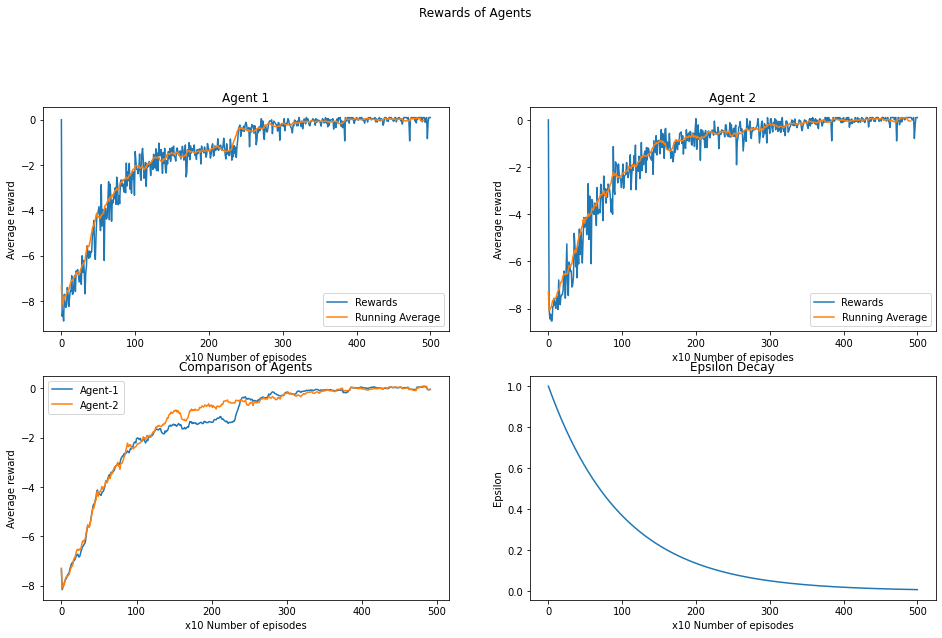

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,14))
plt.suptitle("Rewards of Agents")
window = 10

plt.subplot(3,2,1)
plt.plot(r1)
average_r1 = []
for ind in range(len(r1) - window + 1):
  average_r1.append(np.mean(r1[ind:ind+window]))
plt.plot(average_r1)
plt.title("Agent 1")
plt.xlabel("x10 Number of episodes")
plt.ylabel("Average reward")
plt.legend(["Rewards","Running Average"])

plt.subplot(3,2,2)
plt.plot(r2)
average_r2 = []
for ind in range(len(r2) - window + 1):
  average_r2.append(np.mean(r2[ind:ind+window]))
plt.plot(average_r2)
plt.title("Agent 2")
plt.xlabel("x10 Number of episodes")
plt.ylabel("Average reward")
plt.legend(["Rewards","Running Average"])

plt.subplot(3,2,3)
plt.plot(average_r1)
plt.plot(average_r2)
plt.title("Comparison of Agents")
plt.xlabel("x10 Number of episodes")
plt.ylabel("Average reward")
plt.legend(["Agent-1","Agent-2"])

plt.subplot(3,2,4)
plt.plot(epsilon_decaying)
plt.title("Epsilon Decay")
plt.xlabel("x10 Number of episodes")
plt.ylabel("Epsilon")

1.The above graph shows the average reward vs episode of the agents for 10 episodes.The performance of the agent-1 increases as the number of episode increases.The environment learns.
2.for agent-2 the graph shows the average reward vsa number of episodes where the number of episode is 10.
3.The 3rd graph shows the comparison between the performance of agent 1 and agent 2 both agent perform increases over the episodes.Finally, we conclude that agent 2 performs well over the number of episodes.
4.The 4th graph shows the epsilon decay.the epsilon decay graph decays over the number of episode.


Evaluation

In [ ]:
num_epi= 10#the number of episodes are 10
alpha = 0.01 #learning rate 
gamma = 0.95 #discount factor
epsilon = 1 #used for epsilon greedy
epsilon_decay= 0.999 # epsilon decay
env = MAGridWorld(6,2)

rew = [0,0]
r1,r2 = [],[]

for episode in range(num_epi):

  if episode>0 and episode % 1 == 0:
    print(f"Episode: {episode} Reward: {rew}")
    r1.append(rew[0])
    r2.append(rew[1])
    rew = [0,0]

  state1, state2 =  env.reset()

  state1 = tuple(state1)
  state2 = tuple(state2)
  
  done = [False]*2
  t = 0
  action1 = 0
  action2 = 0
 
  while (not (done[0] or done[1]) and t<=100):
    t+=1
    action1 = np.argmax(q_table[0][state1]) # Exploit learned values
    action2 = np.argmax(q_table[1][state2])
      
    next_state, reward, done, info = env.step([action1,action2])
    
    ns1 = next_state[0]
    ns2 = next_state[1]
    
    ns1 = tuple(ns1)
    ns2 = tuple(ns2)
    
    na1 = np.argmax(q_table[0][ns1])
    na2 = np.argmax(q_table[1][ns2])
    
    state1 = ns1
    state2 = ns2

    rew[0] += reward[0]
    rew[1] += reward[1]

Episode: 1 Reward: [0.10000000000000009, 0.10000000000000009]
Episode: 2 Reward: [0.10000000000000009, 0.10000000000000009]
Episode: 3 Reward: [0.10000000000000009, 0.10000000000000009]
Episode: 4 Reward: [0.10000000000000009, 0.10000000000000009]
Episode: 5 Reward: [0.10000000000000009, 0.10000000000000009]
Episode: 6 Reward: [0.10000000000000009, 0.10000000000000009]
Episode: 7 Reward: [0.10000000000000009, 0.10000000000000009]
Episode: 8 Reward: [0.10000000000000009, 0.10000000000000009]
Episode: 9 Reward: [0.10000000000000009, 0.10000000000000009]


Text(0, 0.5, 'Reward per Episode')

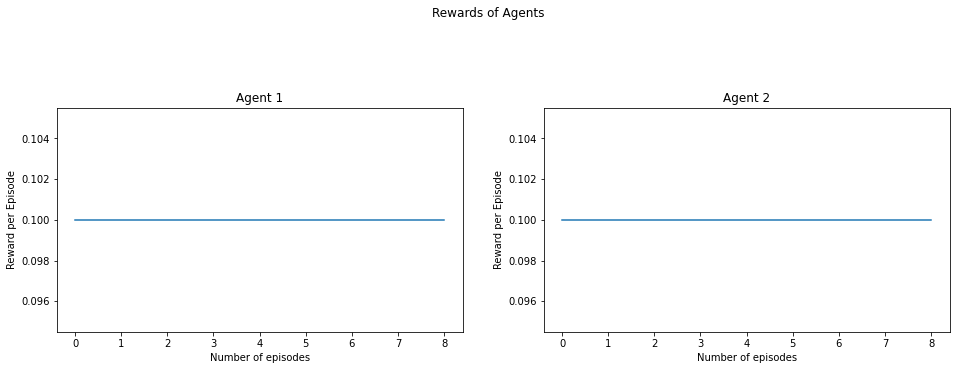

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,14))
plt.suptitle("Rewards of Agents")
window = 10

plt.subplot(3,2,1)
plt.plot(r1)
plt.title("Agent 1")
plt.xlabel("Number of episodes")
plt.ylabel("Reward per Episode")


plt.subplot(3,2,2)
plt.plot(r2)
plt.title("Agent 2")
plt.xlabel("Number of episodes")
plt.ylabel("Reward per Episode")

Visualization

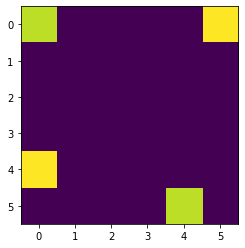

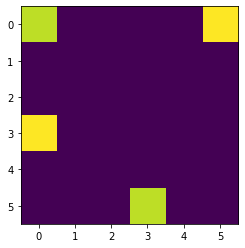

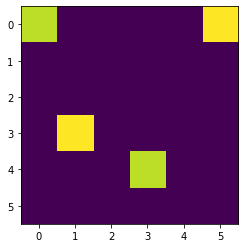

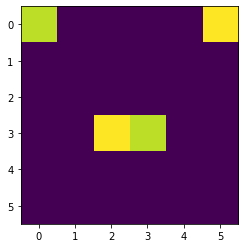

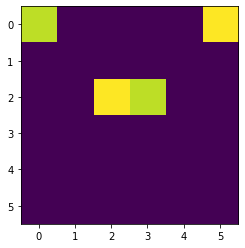

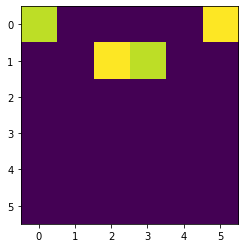

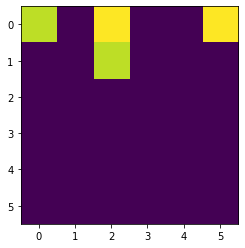

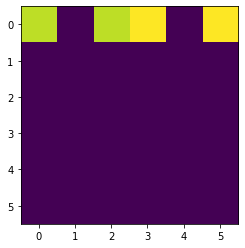

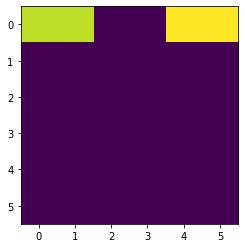

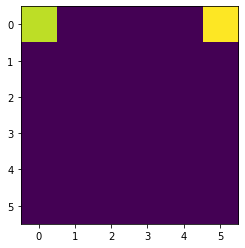

In [ ]:
num_epi= 1                        #During the episode the agents learns the environemnt and reaches the goals.
env = MAGridWorld(6,2)

for episode in range(num_epi):
  state1, state2 =  env.reset()

  state1 = tuple(state1)
  state2 = tuple(state2)
  
  done = [False]*2
  t = 0
  action1 = 0
  action2 = 0
 
  while (not (done[0] or done[1]) and t<=100):
    t+=1

    action1 = np.argmax(q_table[0][state1]) # Exploit learned values
    action2 = np.argmax(q_table[1][state2])
      
    next_state, reward, done, info = env.step([action1,action2])
    
    ns1 = next_state[0]
    ns2 = next_state[1]
    
    ns1 = tuple(ns1)
    ns2 = tuple(ns2)
    
    na1 = np.argmax(q_table[0][ns1])
    na2 = np.argmax(q_table[1][ns2])
    
    state1 = ns1
    state2 = ns2

    plt.figure()
    env.render()   